In [1]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import glob
import cv2
import os
from keras.models import Sequential
from keras.layers.normalization import BatchNormalization
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers.core import Activation
from keras.layers.core import Dropout
from keras.layers.core import Dense
from keras.layers import Flatten
from keras.layers import Input
from keras.models import Model
from sklearn.model_selection import train_test_split
from keras.layers.core import Dense
from keras.models import Model
from keras.optimizers import Adam
from keras.layers import concatenate
import numpy as np
import argparse
import locale
from keras.utils import np_utils
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1337)  # for reproducibility
from keras.datasets import mnist
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.optimizers import RMSprop

Using TensorFlow backend.


In [12]:
	cols = ["bedrooms", "bathrooms", "area", "zipcode", "price"]
	df = pd.read_csv('HousesInfo.txt', sep=" ", header=None, names=cols)
	# determine (1) the unique zip codes and (2) the number of data
	# points with each zip code
	zipcodes = df["zipcode"].value_counts().keys().tolist()
	counts = df["zipcode"].value_counts().tolist()

	# loop over each of the unique zip codes and their corresponding
	# count
	for (zipcode, count) in zip(zipcodes, counts):
		# the zip code counts for our housing dataset is *extremely*
		# unbalanced (some only having 1 or 2 houses per zip code)
		# so let's sanitize our data by removing any houses with less
		# than 25 houses per zip code
		if count < 25:
			idxs = df[df["zipcode"] == zipcode].index
			df.drop(idxs, inplace=True)

In [13]:
%matplotlib inline
plt.style.use('ggplot')

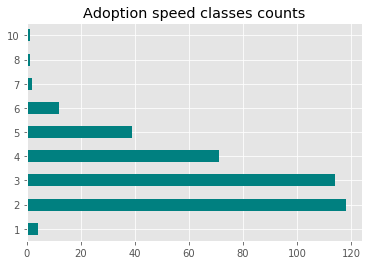

In [14]:
df['bedrooms'].value_counts().sort_index().plot('barh', color='teal');
plt.title('Adoption speed classes counts');

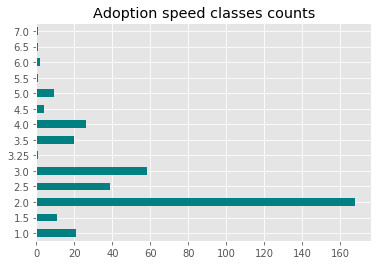

In [15]:
df['bathrooms'].value_counts().sort_index().plot('barh', color='teal');
plt.title('Adoption speed classes counts');

In [16]:
df['bathrooms']=df['bathrooms'].astype(int)

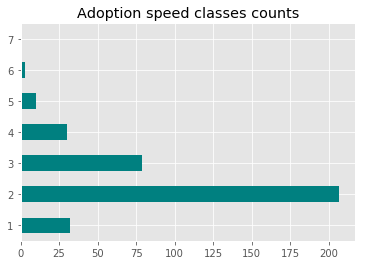

In [17]:
df['bathrooms'].value_counts().sort_index().plot('barh', color='teal');
plt.title('Adoption speed classes counts');

In [18]:
y_train = np_utils.to_categorical(df['bathrooms'], num_classes=8)

In [19]:
maxPrice = df["price"].max()

In [20]:
  df["price"]= df["price"] / maxPrice

In [21]:
	continuous = ["bedrooms", "area","price"]

	# performin min-max scaling each continuous feature column to
	# the range [0, 1]
	cs = MinMaxScaler()
	trainContinuous = cs.fit_transform(df[continuous])

/Users/zekunzhao/venv/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [22]:
	zipBinarizer = LabelBinarizer().fit(df["zipcode"])
	trainCategorical = zipBinarizer.transform(df["zipcode"])

In [23]:
split = train_test_split(df, test_size=0.25, random_state=42)

In [24]:
(trainAttrX, testAttrX) = split

In [33]:
model = Sequential([
    Dense(32, input_dim=10),
    Activation('relu'),
    Dense(8),
    Activation('softmax'),
])

In [34]:
rmsprop = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
# We add metrics to get more results you want to see
model.compile(optimizer=rmsprop,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [35]:
x_train = np.hstack([trainCategorical, trainContinuous])

In [38]:
model.fit(x_train, y_train, epochs=800, batch_size=12)

Epoch 1/800
362/362 [==============================] - 0s 82us/step - loss: 0.5518 - acc: 0.7541
Epoch 2/800
362/362 [==============================] - 0s 156us/step - loss: 0.5499 - acc: 0.7624
Epoch 3/800
362/362 [==============================] - 0s 102us/step - loss: 0.5498 - acc: 0.7624
Epoch 4/800
362/362 [==============================] - 0s 94us/step - loss: 0.5488 - acc: 0.7652
Epoch 5/800
362/362 [==============================] - 0s 89us/step - loss: 0.5488 - acc: 0.7652
Epoch 6/800
362/362 [==============================] - 0s 85us/step - loss: 0.5479 - acc: 0.7735
Epoch 7/800
362/362 [==============================] - 0s 115us/step - loss: 0.5473 - acc: 0.7680
Epoch 8/800
362/362 [==============================] - 0s 83us/step - loss: 0.5475 - acc: 0.7541
Epoch 9/800
362/362 [==============================] - 0s 81us/step - loss: 0.5451 - acc: 0.7680
Epoch 10/800
362/362 [==============================] - 0s 95us/step - loss: 0.5466 - acc: 0.7597
Epoch 11/800
362/362 [====

362/362 [==============================] - 0s 84us/step - loss: 0.5266 - acc: 0.7652
Epoch 84/800
362/362 [==============================] - 0s 88us/step - loss: 0.5268 - acc: 0.7652
Epoch 85/800
362/362 [==============================] - 0s 99us/step - loss: 0.5272 - acc: 0.7652
Epoch 86/800
362/362 [==============================] - 0s 103us/step - loss: 0.5250 - acc: 0.7624
Epoch 87/800
362/362 [==============================] - 0s 87us/step - loss: 0.5265 - acc: 0.7680
Epoch 88/800
362/362 [==============================] - 0s 88us/step - loss: 0.5258 - acc: 0.7707
Epoch 89/800
362/362 [==============================] - 0s 85us/step - loss: 0.5249 - acc: 0.7652
Epoch 90/800
362/362 [==============================] - 0s 84us/step - loss: 0.5250 - acc: 0.7597
Epoch 91/800
362/362 [==============================] - 0s 85us/step - loss: 0.5250 - acc: 0.7707
Epoch 92/800
362/362 [==============================] - 0s 79us/step - loss: 0.5240 - acc: 0.7680
Epoch 93/800
362/362 [==========

362/362 [==============================] - 0s 87us/step - loss: 0.5112 - acc: 0.7735
Epoch 167/800
362/362 [==============================] - 0s 90us/step - loss: 0.5095 - acc: 0.7735
Epoch 168/800
362/362 [==============================] - 0s 90us/step - loss: 0.5095 - acc: 0.7928
Epoch 169/800
362/362 [==============================] - 0s 91us/step - loss: 0.5093 - acc: 0.7707
Epoch 170/800
362/362 [==============================] - 0s 101us/step - loss: 0.5105 - acc: 0.7762
Epoch 171/800
362/362 [==============================] - 0s 90us/step - loss: 0.5093 - acc: 0.7680
Epoch 172/800
362/362 [==============================] - 0s 88us/step - loss: 0.5097 - acc: 0.7735
Epoch 173/800
362/362 [==============================] - 0s 94us/step - loss: 0.5104 - acc: 0.7707
Epoch 174/800
362/362 [==============================] - 0s 92us/step - loss: 0.5086 - acc: 0.7707
Epoch 175/800
362/362 [==============================] - 0s 91us/step - loss: 0.5094 - acc: 0.7652
Epoch 176/800
362/362 [

362/362 [==============================] - 0s 95us/step - loss: 0.4963 - acc: 0.7818
Epoch 249/800
362/362 [==============================] - 0s 93us/step - loss: 0.4970 - acc: 0.7735
Epoch 250/800
362/362 [==============================] - 0s 98us/step - loss: 0.4973 - acc: 0.7735
Epoch 251/800
362/362 [==============================] - 0s 83us/step - loss: 0.4986 - acc: 0.7680
Epoch 252/800
362/362 [==============================] - 0s 83us/step - loss: 0.4966 - acc: 0.7735
Epoch 253/800
362/362 [==============================] - 0s 73us/step - loss: 0.4970 - acc: 0.7735
Epoch 254/800
362/362 [==============================] - 0s 80us/step - loss: 0.4970 - acc: 0.7790
Epoch 255/800
362/362 [==============================] - 0s 77us/step - loss: 0.4958 - acc: 0.7762
Epoch 256/800
362/362 [==============================] - 0s 100us/step - loss: 0.4967 - acc: 0.7735
Epoch 257/800
362/362 [==============================] - 0s 100us/step - loss: 0.4957 - acc: 0.7790
Epoch 258/800
362/362 

362/362 [==============================] - 0s 83us/step - loss: 0.4891 - acc: 0.7707
Epoch 331/800
362/362 [==============================] - 0s 71us/step - loss: 0.4884 - acc: 0.7845
Epoch 332/800
362/362 [==============================] - 0s 79us/step - loss: 0.4874 - acc: 0.7818
Epoch 333/800
362/362 [==============================] - 0s 71us/step - loss: 0.4879 - acc: 0.7735
Epoch 334/800
362/362 [==============================] - 0s 90us/step - loss: 0.4888 - acc: 0.7707
Epoch 335/800
362/362 [==============================] - 0s 77us/step - loss: 0.4884 - acc: 0.7762
Epoch 336/800
362/362 [==============================] - 0s 80us/step - loss: 0.4866 - acc: 0.7707
Epoch 337/800
362/362 [==============================] - 0s 86us/step - loss: 0.4879 - acc: 0.7762
Epoch 338/800
362/362 [==============================] - 0s 84us/step - loss: 0.4874 - acc: 0.7735
Epoch 339/800
362/362 [==============================] - 0s 80us/step - loss: 0.4879 - acc: 0.7735
Epoch 340/800
362/362 [=

362/362 [==============================] - 0s 92us/step - loss: 0.4799 - acc: 0.7818
Epoch 413/800
362/362 [==============================] - 0s 93us/step - loss: 0.4793 - acc: 0.7956
Epoch 414/800
362/362 [==============================] - 0s 90us/step - loss: 0.4805 - acc: 0.7901
Epoch 415/800
362/362 [==============================] - 0s 96us/step - loss: 0.4788 - acc: 0.7845
Epoch 416/800
362/362 [==============================] - 0s 97us/step - loss: 0.4788 - acc: 0.7901
Epoch 417/800
362/362 [==============================] - 0s 95us/step - loss: 0.4775 - acc: 0.7790
Epoch 418/800
362/362 [==============================] - 0s 96us/step - loss: 0.4780 - acc: 0.7845
Epoch 419/800
362/362 [==============================] - 0s 91us/step - loss: 0.4783 - acc: 0.7762
Epoch 420/800
362/362 [==============================] - 0s 92us/step - loss: 0.4801 - acc: 0.7735
Epoch 421/800
362/362 [==============================] - 0s 85us/step - loss: 0.4790 - acc: 0.7818
Epoch 422/800
362/362 [=

362/362 [==============================] - 0s 92us/step - loss: 0.4711 - acc: 0.7873
Epoch 495/800
362/362 [==============================] - 0s 86us/step - loss: 0.4727 - acc: 0.7873
Epoch 496/800
362/362 [==============================] - 0s 98us/step - loss: 0.4712 - acc: 0.7873
Epoch 497/800
362/362 [==============================] - 0s 98us/step - loss: 0.4719 - acc: 0.7956
Epoch 498/800
362/362 [==============================] - 0s 92us/step - loss: 0.4691 - acc: 0.7901
Epoch 499/800
362/362 [==============================] - 0s 93us/step - loss: 0.4704 - acc: 0.7928
Epoch 500/800
362/362 [==============================] - 0s 88us/step - loss: 0.4721 - acc: 0.7873
Epoch 501/800
362/362 [==============================] - 0s 85us/step - loss: 0.4712 - acc: 0.7845
Epoch 502/800
362/362 [==============================] - 0s 84us/step - loss: 0.4709 - acc: 0.7873
Epoch 503/800
362/362 [==============================] - 0s 84us/step - loss: 0.4718 - acc: 0.8011
Epoch 504/800
362/362 [=

362/362 [==============================] - 0s 88us/step - loss: 0.4657 - acc: 0.7818
Epoch 577/800
362/362 [==============================] - 0s 89us/step - loss: 0.4645 - acc: 0.7901
Epoch 578/800
362/362 [==============================] - 0s 83us/step - loss: 0.4645 - acc: 0.7928
Epoch 579/800
362/362 [==============================] - 0s 96us/step - loss: 0.4638 - acc: 0.7790
Epoch 580/800
362/362 [==============================] - 0s 103us/step - loss: 0.4654 - acc: 0.7873
Epoch 581/800
362/362 [==============================] - 0s 92us/step - loss: 0.4642 - acc: 0.7845
Epoch 582/800
362/362 [==============================] - 0s 94us/step - loss: 0.4632 - acc: 0.7901
Epoch 583/800
362/362 [==============================] - 0s 95us/step - loss: 0.4660 - acc: 0.7901
Epoch 584/800
362/362 [==============================] - 0s 89us/step - loss: 0.4650 - acc: 0.7928
Epoch 585/800
362/362 [==============================] - 0s 89us/step - loss: 0.4645 - acc: 0.7790
Epoch 586/800
362/362 [

362/362 [==============================] - 0s 82us/step - loss: 0.4600 - acc: 0.7707
Epoch 659/800
362/362 [==============================] - 0s 89us/step - loss: 0.4592 - acc: 0.7901
Epoch 660/800
362/362 [==============================] - 0s 90us/step - loss: 0.4605 - acc: 0.7956
Epoch 661/800
362/362 [==============================] - 0s 96us/step - loss: 0.4592 - acc: 0.7873
Epoch 662/800
362/362 [==============================] - 0s 90us/step - loss: 0.4582 - acc: 0.7790
Epoch 663/800
362/362 [==============================] - 0s 83us/step - loss: 0.4586 - acc: 0.7956
Epoch 664/800
362/362 [==============================] - 0s 87us/step - loss: 0.4598 - acc: 0.7901
Epoch 665/800
362/362 [==============================] - 0s 88us/step - loss: 0.4595 - acc: 0.7928
Epoch 666/800
362/362 [==============================] - 0s 88us/step - loss: 0.4577 - acc: 0.7956
Epoch 667/800
362/362 [==============================] - 0s 92us/step - loss: 0.4601 - acc: 0.7901
Epoch 668/800
362/362 [=

362/362 [==============================] - 0s 92us/step - loss: 0.4536 - acc: 0.7928
Epoch 741/800
362/362 [==============================] - 0s 95us/step - loss: 0.4545 - acc: 0.7983
Epoch 742/800
362/362 [==============================] - 0s 89us/step - loss: 0.4549 - acc: 0.7901
Epoch 743/800
362/362 [==============================] - 0s 93us/step - loss: 0.4547 - acc: 0.7845
Epoch 744/800
362/362 [==============================] - 0s 93us/step - loss: 0.4558 - acc: 0.7873
Epoch 745/800
362/362 [==============================] - 0s 93us/step - loss: 0.4542 - acc: 0.7928
Epoch 746/800
362/362 [==============================] - 0s 90us/step - loss: 0.4544 - acc: 0.7790
Epoch 747/800
362/362 [==============================] - 0s 89us/step - loss: 0.4539 - acc: 0.7873
Epoch 748/800
362/362 [==============================] - 0s 96us/step - loss: 0.4547 - acc: 0.7928
Epoch 749/800
362/362 [==============================] - 0s 96us/step - loss: 0.4523 - acc: 0.7956
Epoch 750/800
362/362 [=

In [39]:
loss, accuracy = model.evaluate(x_train, y_train)

print('test loss: ', loss)
print('test accuracy: ', accuracy)


362/362 [==============================] - 0s 27us/step
test loss:  0.44268237490680334
test accuracy:  0.7983425417657715
